In [1]:
import mapomatic as mm
from qiskit import QuantumCircuit
from qiskit import transpile
from qiskit.tools.visualization import plot_histogram
from qiskit.visualization import array_to_latex
from qiskit.quantum_info import DensityMatrix, state_fidelity
import numpy as np
from qiskit import Aer

from qiskit.test.mock import FakeKolkata, FakeJakarta, FakeGuadalupe, FakeWashington, FakeManila
from qiskit.providers.aer.noise import NoiseModel
from qiskit_dynamics.backend import DynamicsBackend
#backend= DynamicsBackend.from_backend(FakeKolkata(), subsystem_list=[0,1,2,3])
# backend=FakeKolkata()
backend=FakeGuadalupe()
simulator=Aer.get_backend('aer_simulator')
from qiskit_experiments.library import StateTomography

C:\Users\kimje\AppData\Local\Temp\ipykernel_272\633864480.py:10: DeprecationWarning: The module 'qiskit.test.mock' is deprecated since Qiskit Terra 0.21.0, and will be removed 3 months or more later. Instead, you should import the desired object directly 'qiskit.providers.fake_provider'.
  from qiskit.test.mock import FakeKolkata, FakeJakarta, FakeGuadalupe, FakeWashington, FakeManila


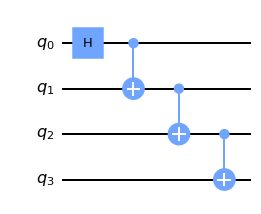

In [2]:
ghz=QuantumCircuit(4)
ghz.h(0)
ghz.cx(0,1)
ghz.cx(1,2)
ghz.cx(2,3)
#ghz.measure_all()
ghz.draw('mpl')

In [6]:
st=StateTomography(ghz)
stdata=st.run(backend).block_for_results()
state_result=stdata.analysis_results("state")
array_to_latex(state_result.value)

Adding a job from a backend (aer_simulator) that is different than the current backend (fake_kolkata). The new backend will be used, but service is not changed if one already exists.


<IPython.core.display.Latex object>

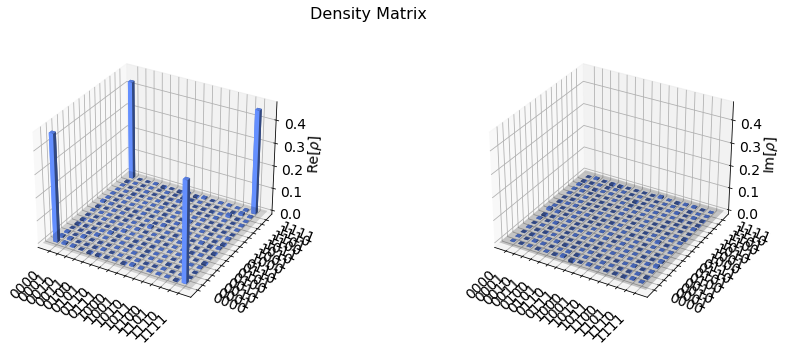

In [14]:
from qiskit.visualization import plot_state_city
plot_state_city(stdata.analysis_results("state").value, title='Density Matrix')

In [7]:
fid_result=stdata.analysis_results("state_fidelity")
print(f"State Fidelity = {fid_result.value}")

State Fidelity = 0.8997754291297972


In [53]:
backend=FakeLagos()

The best string is predicted to be [1, 2, 3, 4]
The worst string is predicted to be [0, 1, 2, 3]


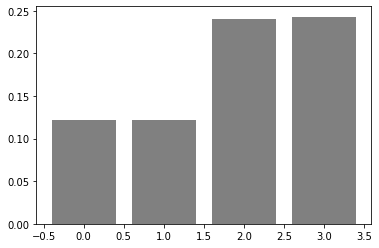

In [3]:
# select qubits
trans_ghz=transpile(ghz, backend, optimization_level=1)
small_ghz=mm.deflate_circuit(trans_ghz)
layouts=mm.matching_layouts(small_ghz,backend)
scores = mm.evaluate_layouts(small_ghz, layouts, backend)
import matplotlib.pyplot as plt
plt.bar(range(len(scores)), [i[1] for i in scores],color='grey')
print(f"The best string is predicted to be {scores[0][0]}")
print(f"The worst string is predicted to be {scores[-1][0]}")

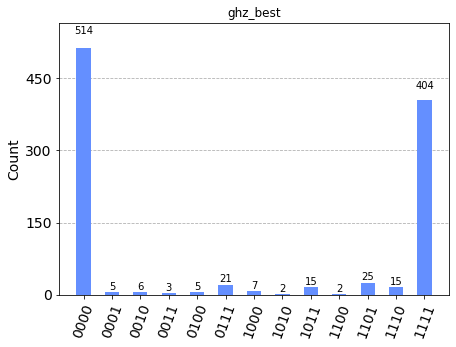

In [5]:
ghz_best=transpile(ghz, backend, initial_layout=[1,2,3,4])
result_best=backend.run(ghz_best).result()
counts_best=result_best.get_counts()
plot_histogram(counts_best, title='ghz_best')

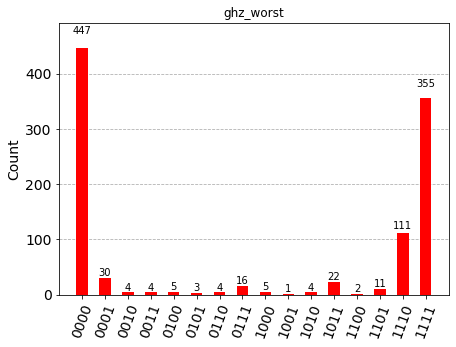

In [6]:
ghz_worst=transpile(ghz, backend, optimization_level=1, initial_layout=[0,1,2,3])
result_worst=backend.run(ghz_worst).result()
counts_worst=result_worst.get_counts()
plot_histogram(counts_worst, title='ghz_worst', color='r')

The best string is predicted to be [3, 1, 5, 6]
The worst string is predicted to be [3, 1, 5, 4]


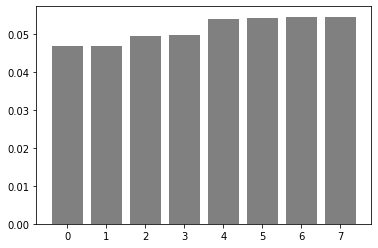

In [ ]:
# select qubits
trans_ghz=transpile(ghz, backend, optimization_level=1)
small_ghz=mm.deflate_circuit(trans_ghz)
layouts=mm.matching_layouts(small_ghz,backend)
scores = mm.evaluate_layouts(small_ghz, layouts, backend)
import matplotlib.pyplot as plt
plt.bar(range(len(scores)), [i[1] for i in scores],color='grey')
print(f"The best string is predicted to be {scores[0][0]}")
print(f"The worst string is predicted to be {scores[-1][0]}")

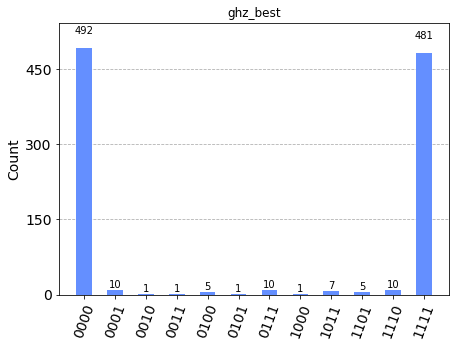

In [ ]:
ghz_best=transpile(ghz, backend, initial_layout=[3,1,5,6])
result_best=backend.run(ghz_best).result()
counts_best=result_best.get_counts()
plot_histogram(counts_best, title='ghz_best')

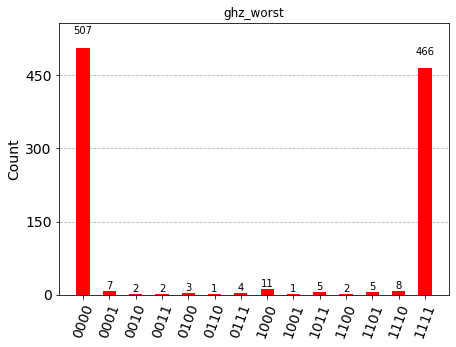

In [ ]:
ghz_worst=transpile(ghz, backend, optimization_level=1, initial_layout=[3,1,5,4])
result_worst=backend.run(ghz_worst).result()
counts_worst=result_worst.get_counts()
plot_histogram(counts_worst, title='ghz_worst', color='r')

In [49]:
backend=FakeWashington()

The best string is predicted to be [97, 96, 95, 94]
The worst string is predicted to be [109, 96, 97, 98]


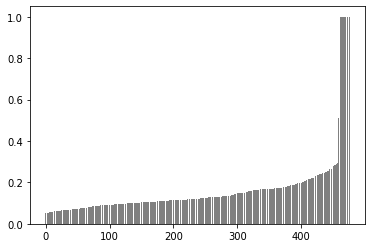

In [50]:
# select qubits
trans_ghz=transpile(ghz, backend, optimization_level=1)
small_ghz=mm.deflate_circuit(trans_ghz)
layouts=mm.matching_layouts(small_ghz,backend)
scores = mm.evaluate_layouts(small_ghz, layouts, backend)
import matplotlib.pyplot as plt
plt.bar(range(len(scores)), [i[1] for i in scores], color='grey')
print(f"The best string is predicted to be {scores[0][0]}")
print(f"The worst string is predicted to be {scores[-1][0]}")

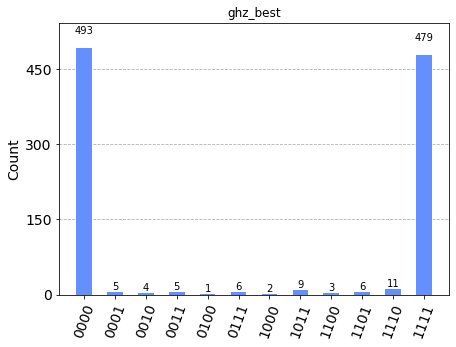

In [33]:
ghz_best=transpile(ghz, backend, initial_layout=[97,96,95,94])
result_best=backend.run(ghz_best).result()
counts_best=result_best.get_counts()
plot_histogram(counts_best, title='ghz_best')

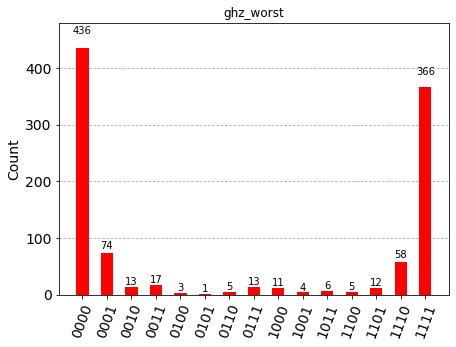

In [43]:
ghz_worst=transpile(ghz, backend, optimization_level=1, initial_layout=[100,96,97,98])
result_worst=backend.run(ghz_worst).result()
counts_worst=result_worst.get_counts()
plot_histogram(counts_worst, title='ghz_worst', color='red')

In [3]:
backend=FakeGuadalupe()

The best string is predicted to be [10, 7, 4, 1]
The worst string is predicted to be [1, 2, 3, 5]


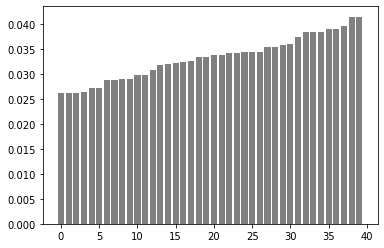

In [4]:
# select qubits
trans_ghz=transpile(ghz, backend, optimization_level=1)
small_ghz=mm.deflate_circuit(trans_ghz)
layouts=mm.matching_layouts(small_ghz,backend)
scores = mm.evaluate_layouts(small_ghz, layouts, backend)
import matplotlib.pyplot as plt
plt.bar(range(len(scores)), [i[1] for i in scores], color='grey')
print(f"The best string is predicted to be {scores[0][0]}")
print(f"The worst string is predicted to be {scores[-1][0]}")

In [10]:
layouts

[[4, 1, 2, 3],
 [0, 1, 2, 3],
 [2, 1, 4, 7],
 [0, 1, 4, 7],
 [3, 2, 1, 4],
 [3, 2, 1, 0],
 [1, 2, 3, 5],
 [7, 4, 1, 2],
 [7, 4, 1, 0],
 [1, 4, 7, 10],
 [1, 4, 7, 6],
 [10, 7, 4, 1],
 [6, 7, 4, 1],
 [4, 7, 10, 12],
 [6, 7, 10, 12],
 [5, 3, 2, 1],
 [2, 3, 5, 8],
 [8, 5, 3, 2],
 [3, 5, 8, 11],
 [3, 5, 8, 9],
 [12, 10, 7, 4],
 [12, 10, 7, 6],
 [7, 10, 12, 13],
 [7, 10, 12, 15],
 [11, 8, 5, 3],
 [9, 8, 5, 3],
 [5, 8, 11, 14],
 [9, 8, 11, 14],
 [13, 12, 10, 7],
 [15, 12, 10, 7],
 [10, 12, 13, 14],
 [15, 12, 13, 14],
 [14, 11, 8, 5],
 [14, 11, 8, 9],
 [8, 11, 14, 13],
 [14, 13, 12, 10],
 [14, 13, 12, 15],
 [12, 13, 14, 11],
 [13, 14, 11, 8],
 [11, 14, 13, 12]]

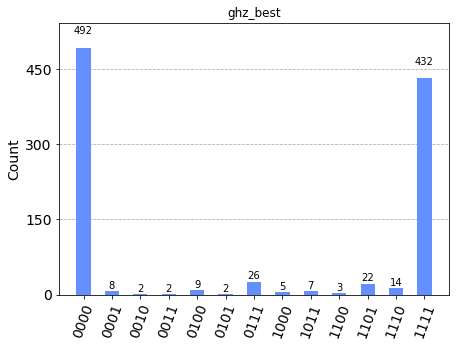

In [18]:
ghz_best=transpile(ghz, backend, initial_layout=[15,12,13,14])
result_best=backend.run(ghz_best).result()
counts_best=result_best.get_counts()
plot_histogram(counts_best, title='ghz_best')

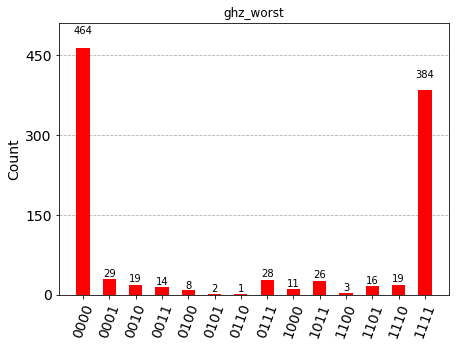

In [45]:
ghz_worst=transpile(ghz, backend, optimization_level=1, initial_layout=[2,3,4,8])
result_worst=backend.run(ghz_worst).result()
counts_worst=result_worst.get_counts()
plot_histogram(counts_worst, title='ghz_worst', color='red')

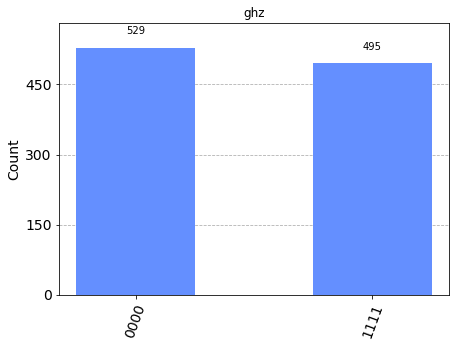

In [20]:
# Ideal
result_ideal=simulator.run(ghz).result()
counts_ideal=result_ideal.get_counts()
plot_histogram(counts_ideal, title='ghz')

The best string is predicted to be [15, 12, 13, 14]
The worst string is predicted to be [2, 3, 5, 8]


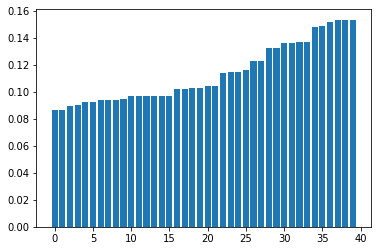

In [38]:
# select qubits
trans_ghz=transpile(ghz, backend, optimization_level=1)
small_ghz=mm.deflate_circuit(trans_ghz)
layouts=mm.matching_layouts(small_ghz,backend)
scores = mm.evaluate_layouts(small_ghz, layouts, backend)
import matplotlib.pyplot as plt
plt.bar(range(len(scores)), [i[1] for i in scores])
print(f"The best string is predicted to be {scores[0][0]}")
print(f"The worst string is predicted to be {scores[-1][0]}")

In [57]:
ghz=QuantumCircuit(4)
ghz.h(0)
ghz.cx(0,1)
ghz.cx(1,2)
ghz.cx(2,3)

In [58]:
ghz_best=transpile(ghz, backend, initial_layout=[3,1,5,6])
st=StateTomography(ghz_best)
stdata=st.run(backend).block_for_results()
state_result=stdata.analysis_results("state")
array_to_latex(state_result.value)

Adding a job from a backend (aer_simulator) that is different than the current backend (fake_lagos). The new backend will be used, but service is not changed if one already exists.


<IPython.core.display.Latex object>

In [ ]:
plot_state_city(stdata.analysis_results("state").value, title='Density Matrix')
fid_result=stdata.analysis_results("state_fidelity")
print(f"State Fidelity = {fid_result.value}")

In [ ]:
ghz_worst=transpile(ghz, backend, optimization_level=1, initial_layout=[2,3,5,8])
st=StateTomography(ghz_worst)
stdata=st.run(backend).block_for_results()
state_result=stdata.analysis_results("state")
array_to_latex(state_result.value)

In [ ]:
plot_state_city(stdata.analysis_results("state").value, title='Density Matrix')
fid_result=stdata.analysis_results("state_fidelity")
print(f"State Fidelity = {fid_result.value}")

### state fidelity with measurement counts

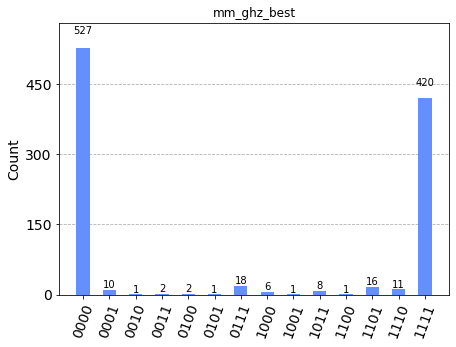

In [39]:
ghz_best=transpile(ghz, backend, initial_layout=[15,12,13,14])
result_best=backend.run(ghz_best).result()
counts_best=result_best.get_counts()
plot_histogram(counts_best, title='mm_ghz_best')

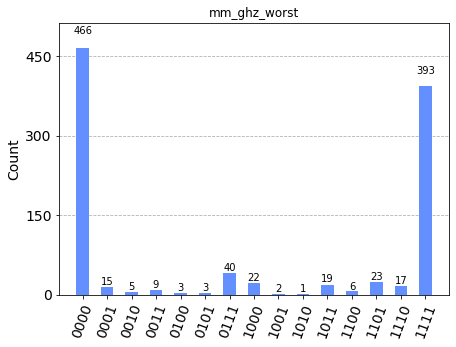

In [40]:
ghz_worst=transpile(ghz, backend, optimization_level=1, initial_layout=[2,3,5,8])
result_worst=backend.run(ghz_worst).result()
counts_worst=result_worst.get_counts()
plot_histogram(counts_worst, title='mm_ghz_worst')

In [21]:
def state(counts):
    counts_keys=list(counts.keys())
    counts_values=list(counts.values())
    shot=counts.shots()
    for i in range(len(counts_keys)):
        if counts_keys[i]=='1111':
            p_1=(counts_values[i])/shot
            p1=np.sqrt(p_1)
        if counts_keys[i]=='0000':
            p_0=(counts_values[i])/shot
            p0=np.sqrt(p_0)
    coeff=[p0,p1,np.sqrt(1-(p_0+p_1))]
    state=np.array(coeff)
    return state
                    

In [35]:
best=state(counts_best)
worst=state(counts_worst)
ideal=state(counts_ideal)
bestmtx=DensityMatrix(best)
worstmtx=DensityMatrix(worst)
idealmtx=DensityMatrix(ideal)

In [36]:
a=state_fidelity(idealmtx, worstmtx)
b=state_fidelity(idealmtx, bestmtx)
print(a,b)

0.801756910882109 0.9491348309708262
